In [2]:
import prosperity3bt

In [3]:
from prosperity3bt.runner import run_backtest
from prosperity3bt.models import TradeMatchingMode
from prosperity3bt.file_reader import FileSystemReader
from pathlib import Path

from trader_best import Trader

trader = Trader()

file_reader = FileSystemReader(Path('.'))

backtest_results = prosperity3bt.runner.run_backtest(trader, file_reader=file_reader, round_num=1, day_num=0, print_output=True, trade_matching_mode=TradeMatchingMode.all, no_names=True, show_progress_bar=True)

100%|##########| 10000/10000 [00:02<00:00, 4913.71it/s]


In [ ]:
def print_overall_summary(results: list[BacktestResult]) -> None:
    print("Profit summary:")

    total_profit = 0
    for result in results:
        last_timestamp = result.activity_logs[-1].timestamp

        profit = 0
        for row in reversed(result.activity_logs):
            if row.timestamp != last_timestamp:
                break

            profit += row.columns[-1]

        print(f"Round {result.round_num} day {result.day_num}: {profit:,.0f}")
        total_profit += profit

    print(f"Total profit: {total_profit:,.0f}")

[ActivityLogRow(columns=[0, 0, 'KELP', 2028, 30, '', '', '', '', 2032, 30, '', '', '', '', 2030.0, 0.0]),
 ActivityLogRow(columns=[0, 0, 'RAINFOREST_RESIN', 9998, 1, 9995, 30, '', '', 10005, 30, '', '', '', '', 10001.5, 0.0]),
 ActivityLogRow(columns=[0, 0, 'SQUID_INK', 1968, 30, '', '', '', '', 1971, 30, '', '', '', '', 1969.5, 0.0]),
 ActivityLogRow(columns=[0, 100, 'KELP', 2030, 4, 2028, 31, '', '', 2032, 31, '', '', '', '', 2031.0, 0.0]),
 ActivityLogRow(columns=[0, 100, 'RAINFOREST_RESIN', 9996, 1, 9995, 30, '', '', 10002, 6, 10004, 1, 10005, 30, 9999.0, 0.0]),
 ActivityLogRow(columns=[0, 100, 'SQUID_INK', 1969, 4, 1967, 31, '', '', 1971, 31, '', '', '', '', 1970.0, 0.0]),
 ActivityLogRow(columns=[0, 200, 'KELP', 2029, 1, 2028, 21, '', '', 2032, 22, '', '', '', '', 2030.5, 0.0]),
 ActivityLogRow(columns=[0, 200, 'RAINFOREST_RESIN', 9996, 1, 9995, 21, '', '', 10004, 1, 10005, 21, '', '', 10000.0, 2.0]),
 ActivityLogRow(columns=[0, 200, 'SQUID_INK', 1966, 1, 1965, 21, '', '', 1969, 

In [41]:
from read_submission_log import read_submission_log

market, trades, sandbox = read_submission_log('submissions/trader_kin2.log')

In [42]:
from matplotlib import pyplot as plt

In [43]:
ink = market[market['product'] == 'SQUID_INK']
resin = market[market['product'] == 'RAINFOREST_RESIN']
kelp = market[market['product'] == 'KELP']

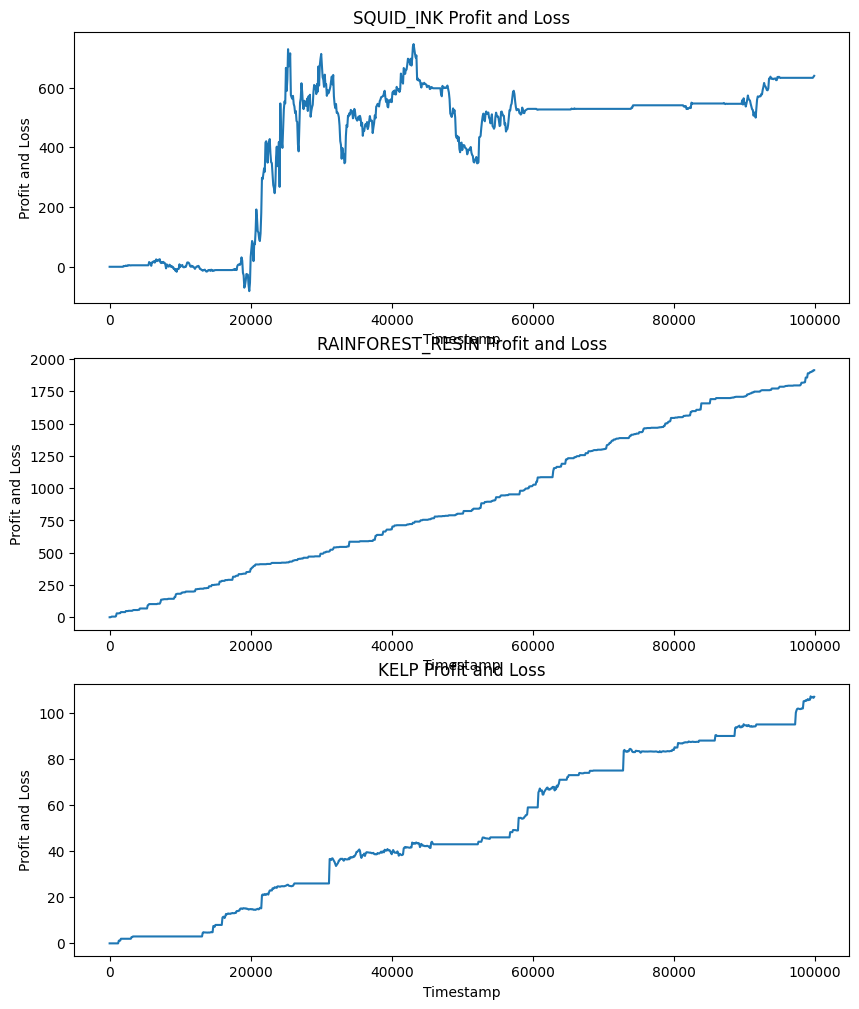

In [44]:
# line chart of resin, kelp, ink profit_and_loss over timestamp
plt.figure(figsize=(10, 12))

for df in [ink, resin, kelp]:
    plt.subplot(3, 1, df.index[0] + 1)
    plt.plot(df['timestamp'], df['profit_and_loss'])
    plt.title(df['product'].iloc[0] + ' Profit and Loss')
    plt.xlabel('Timestamp')
    plt.ylabel('Profit and Loss')
plt.show()

In [45]:
# profits of each at the last timestamp
print("Profits at last timestamp:")
print('Resin:', resin['profit_and_loss'].iloc[-1])
print('Kelp:', kelp['profit_and_loss'].iloc[-1])
print('Ink:', ink['profit_and_loss'].iloc[-1])


Profits at last timestamp:
Resin: 1914.0
Kelp: 107.0
Ink: 639.597412109375


In [49]:
trades

,timestamp,buyer,seller,symbol,currency,price,quantity
0,100,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10002,1
1,100,,,KELP,SEASHELLS,2034,1
2,200,,SUBMISSION,RAINFOREST_RESIN,SEASHELLS,10003,1
3,200,,,KELP,SEASHELLS,2035,1
4,200,,,SQUID_INK,SEASHELLS,1835,1
...,...,...,...,...,...,...,...
1046,99700,SUBMISSION,,RAINFOREST_RESIN,SEASHELLS,9996,2
1047,99700,SUBMISSION,,SQUID_INK,SEASHELLS,1814,2
1048,99700,,,KELP,SEASHELLS,2034,2
1049,99900,,,KELP,SEASHELLS,2035,1


In [ ]:
market.drop(columns=['profit_and_loss']).to_csv('submissions/prices_round_1_day_.csv', index=False)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0
1,1,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5
4,1,100,SQUID_INK,1837,1,1836.0,2.0,1835.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,99800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.5
2996,1,99800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0
2997,1,99900,SQUID_INK,1816,27,NaN,NaN,NaN,NaN,1819,28,NaN,NaN,NaN,NaN,1817.5
2998,1,99900,RAINFOREST_RESIN,9998,6,9996.0,1.0,9995.0,27.0,10004,1,10005.0,27.0,NaN,NaN,10001.0


In [ ]:
'''
website submission

trader_best2
Profits at last timestamp:
Resin: 1939.0
Kelp: 506.599609375
Ink: 1572.0

trader_kin2:
Profits at last timestamp:
Resin: 1914.0
Kelp: 107.0
Ink: 639.597412109375

'''
